In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import abupy
abupy.env.disable_example_env_ipython()

disable example env


In [2]:
from abupy import AbuFactorAtrNStop, AbuFactorPreAtrNStop  # 止盈止损策略、单日最大跌幅止损策略
from abupy import AbuFactorBuyBreak, AbuFactorSellBreak # 正向突破买入策略、正向突破卖出策略
from abupy import abu, EMarketTargetType, ABuProgress # 市场类型，辅助进度显示模块

# A股涨跌停的特殊处理
from abupy import slippage
# 开启针对非集合竞价阶段的涨停，滑点买入价格以高概率在接近涨停的价格买入
slippage.sbb.g_enable_limit_up = True
# 将集合竞价阶段的涨停买入成功概率设置为0，如果设置为0.2即20%概率成功买入
slippage.sbb.g_pre_limit_up_rate = 0
# 开启针对非集合竞价阶段的跌停，滑点卖出价格以高概率在接近跌停的价格卖出
slippage.ssb.g_enable_limit_down = True
# 将集合竞价阶段的跌停卖出成功概率设置为0, 如果设置为0.2即20%概率成功卖出
slippage.ssb.g_pre_limit_down_rate = 0

abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_CN # 设置为A股回测环境

# 初始资金数
read_cash = 1000000

# 买入因子
buy_factors = [{'class': AbuFactorBuyBreak,'xd': 90}, # 90天向上突破买入
               {'class': AbuFactorBuyBreak,'xd': 60}] # 60天向上突破买入

# 卖出因子
sell_factors = [
    {'class': AbuFactorAtrNStop,'stop_loss_n': 2.0, 'stop_win_n': 3.0},# Atr 2倍止损，Atr 3倍止盈
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},# 单日最大跌幅超过Atr 1.5倍 止损
    {'class': AbuFactorSellBreak, 'xd': 60} # 60天向下突破卖出
]

# 择时股票池
choice_symbols = ['000400', '000525', '600104']

# 使用run_loop_back运行策略

abu_result_tuple, kl_pd_manger = abu.run_loop_back(read_cash, 
                                                   buy_factors, 
                                                   sell_factors, 
                                                   stock_picks=None, 
                                                   choice_symbols=choice_symbols,
                                                   n_folds=2, # 回测时间2年
                                                   start=None,
                                                   end=None,
                                                   commission_dict=None, #手续费默认
                                                   n_process_kl=None, # 金融时间序列数据收集启动并行的进程数
                                                   n_process_pick=None) # 择时与选股操作启动并行的进程数
ABuProgress.clear_output()

In [3]:
abu_result_tuple[0] # orders_pd

,buy_date,buy_price,buy_cnt,buy_factor,symbol,buy_pos,buy_type_str,expect_direction,sell_type_extra,sell_date,sell_price,sell_type,ml_features,key,profit,result
2016-07-13,20160713,16.290,11300.0,AbuFactorBuyBreak:60,000400,AbuAtrPosition,call,1.0,AbuFactorPreAtrNStop:pre_atr=1.5,20160728,15.530,loss,None,60,-8588.0,-1
2016-07-13,20160713,19.890,10000.0,AbuFactorBuyBreak:60,600104,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_win=3.0,20170120,23.820,win,None,60,39300.0,1
2016-07-27,20160727,13.330,14200.0,AbuFactorBuyBreak:60,000525,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_win=3.0,20161117,16.555,win,None,70,45795.0,1
2016-08-24,20160824,15.150,10900.0,AbuFactorBuyBreak:90,000525,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_win=3.0,20170302,19.840,win,None,90,51121.0,1
2016-10-13,20161013,16.450,11500.0,AbuFactorBuyBreak:90,000400,AbuAtrPosition,call,1.0,AbuFactorSellBreak:60,20170316,17.240,win,None,119,9085.0,1
2016-10-21,20161021,16.480,12100.0,AbuFactorBuyBreak:60,000400,AbuAtrPosition,call,1.0,AbuFactorSellBreak:60,20170316,17.240,win,None,124,9196.0,1
2016-11-23,20161123,16.905,11800.0,AbuFactorBuyBreak:60,000525,AbuAtrPosition,call,1.0,AbuFactorPreAtrNStop:pre_atr=1.5,20170329,18.795,win,None,147,22302.0,1
2016-11-25,20161125,23.345,8500.0,AbuFactorBuyBreak:60,600104,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_win=3.0,20170531,27.820,win,None,149,38037.5,1
2016-11-25,20161125,23.345,8500.0,AbuFactorBuyBreak:90,600104,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_win=3.0,20170531,27.820,win,None,149,38037.5,1
2017-02-06,20170206,20.050,5400.0,AbuFactorBuyBreak:90,000525,AbuAtrPosition,call,1.0,AbuFactorPreAtrNStop:pre_atr=1.5,20170329,18.795,loss,None,194,-6777.0,-1


In [4]:
abu_result_tuple[1] # action_pd

,Date,Price,Cnt,symbol,Direction,Price2,action,deal
0,20160713,16.290,11300.0,000400,1.0,15.530,buy,True
1,20160713,19.890,10000.0,600104,1.0,23.820,buy,True
2,20160727,13.330,14200.0,000525,1.0,16.555,buy,True
3,20160728,15.530,11300.0,000400,1.0,16.290,sell,True
4,20160824,15.150,10900.0,000525,1.0,19.840,buy,True
5,20161013,16.450,11500.0,000400,1.0,17.240,buy,True
6,20161021,16.480,12100.0,000400,1.0,17.240,buy,True
7,20161117,16.555,14200.0,000525,1.0,13.330,sell,True
8,20161123,16.905,11800.0,000525,1.0,18.795,buy,True
9,20161125,23.345,8500.0,600104,1.0,27.820,buy,False


买入后卖出的交易数量:17
买入后尚未卖出的交易数量:4
胜率:58.8235%
平均获利期望:18.8720%
平均亏损期望:-4.4737%
盈亏比:7.4394
策略收益: 10.9219%
基准收益: 2.1946%
策略年化收益: 5.6749%
基准年化收益: 1.1403%
策略买入成交比例:90.4762%
策略资金利用率比例:34.0606%
策略共执行485个交易日


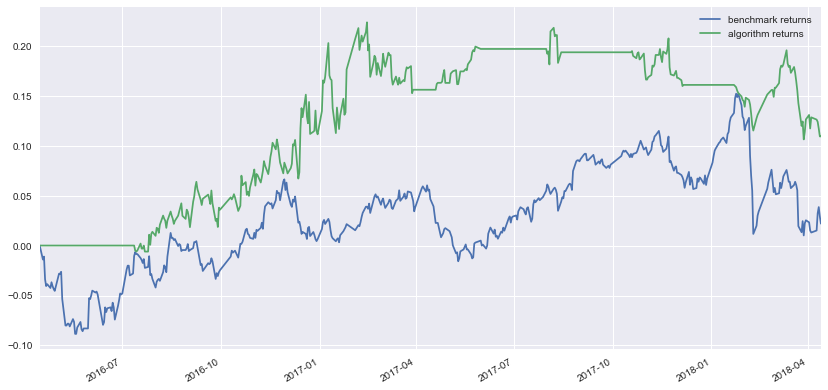

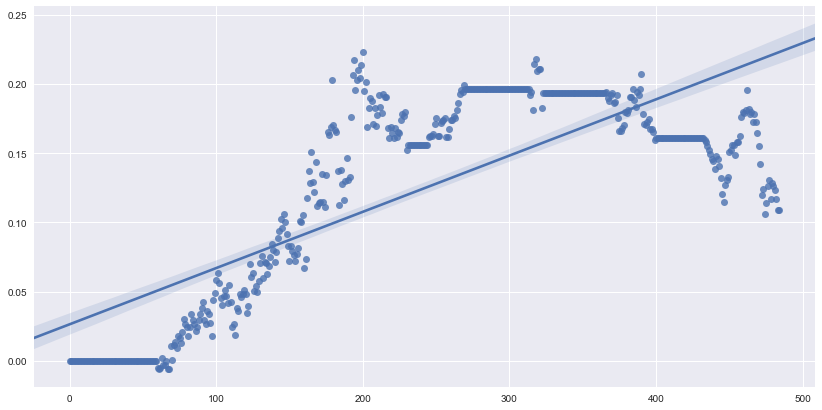

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


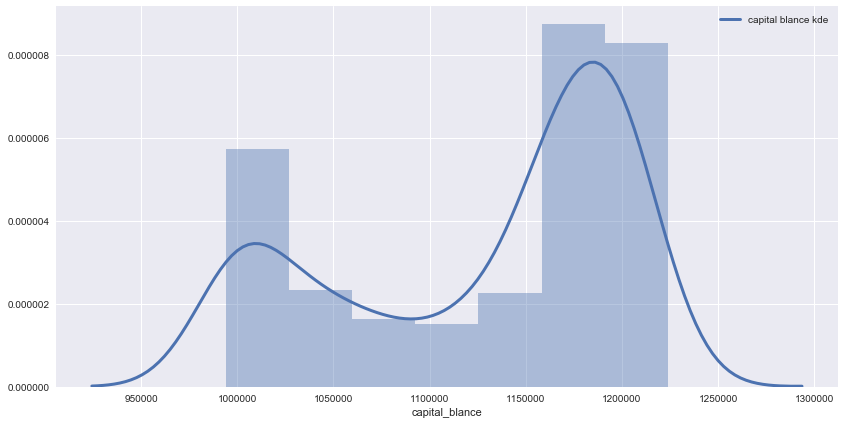

alpha阿尔法:0.0562
beta贝塔:0.3095
Information信息比率:0.0185
策略Sharpe夏普比率: 0.4894
基准Sharpe夏普比率: 0.1538
策略波动率Volatility: 0.1266
基准波动率Volatility: 0.1218
因子平均生效间隔:42.857142857142854


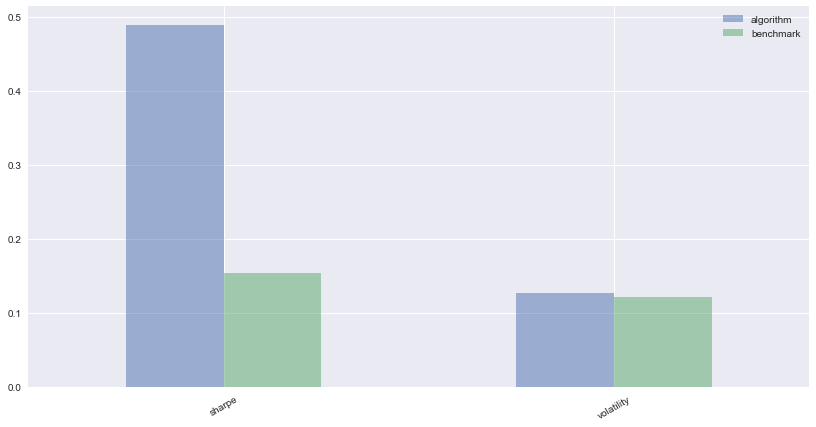

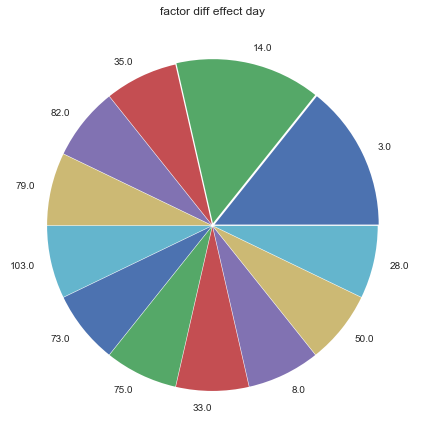

策略持股天数平均数: 90.095
策略持股天数中位数: 77.000


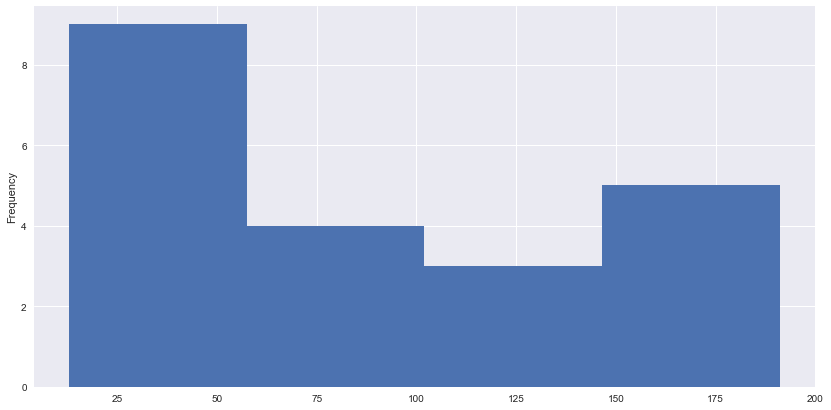

卖出择时生效因子分布：
AbuFactorAtrNStop:stop_win=3.0      7
AbuFactorPreAtrNStop:pre_atr=1.5    7
AbuFactorSellBreak:60               3
dtype: int64


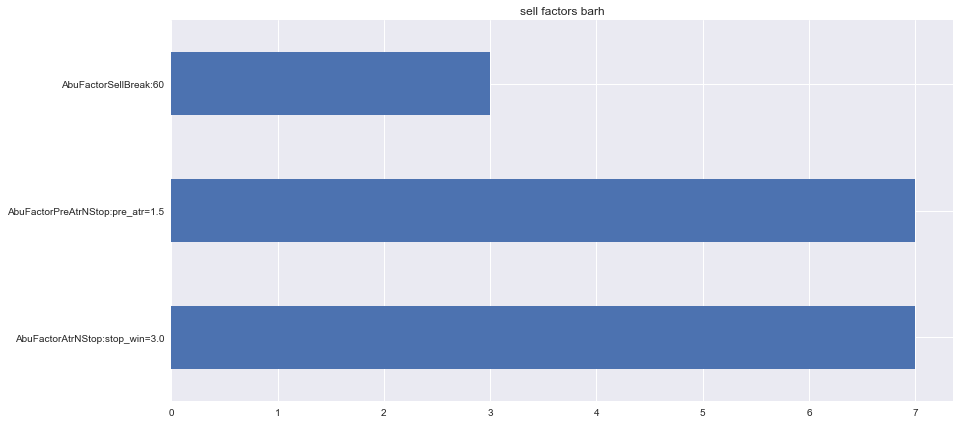

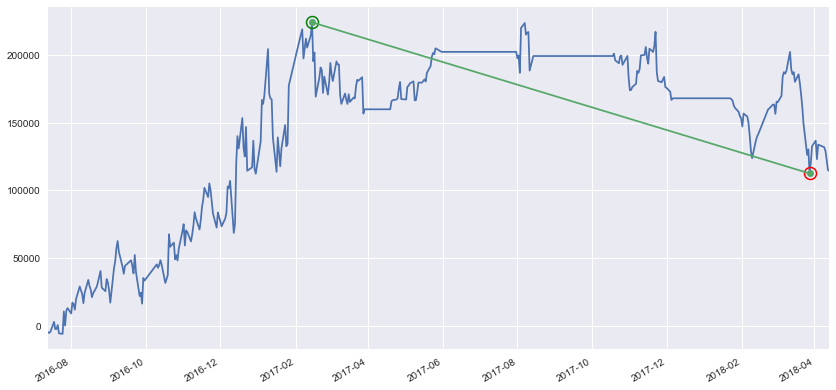

最大回撤: 0.091062
最大回测启始时间:2017-02-14, 结束时间2018-03-28, 共回测111453.596000


In [5]:
from abupy import AbuMetricsBase #度量基类


# AbuMetricsBase.show_general(*abu_result_tuple, returns_cmp=False, # 基本度量函数封装
#                      only_info=False, only_show_returns=False, enable_stocks_full_rate_factor=False)

metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp() # 基本度量信息
metrics.plot_sharp_volatility_cmp() # 策略与基准之间波动率和夏普比率关系
metrics.plot_effect_mean_day() # 买入因子生效间隔天数
metrics.plot_keep_days()    # 策略持股天数
metrics.plot_sell_factors() # 策略卖出因子生效分布情况
metrics.plot_max_draw_down() # 计算最大回撤并可视化